In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as px

In [2]:
data=pd.read_csv('weather data.csv')
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


ANALYZE THE DATA

In [3]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
data.shape

(8784, 8)

In [5]:
data.index

RangeIndex(start=0, stop=8784, step=1)

In [6]:
data['Date/Time']=pd.to_datetime(data['Date/Time'])

In [7]:
data.describe()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2012-07-01 23:30:00,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
min,2012-01-01 00:00:00,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,2012-04-01 11:45:00,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,2012-07-01 23:30:00,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,2012-10-01 11:15:00,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,2012-12-31 23:00:00,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005


In [8]:
data.dtypes

Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object

In [9]:
weather=data['Weather'].unique()
for weathers in weather:
    print("->",weathers)

-> Fog
-> Freezing Drizzle,Fog
-> Mostly Cloudy
-> Cloudy
-> Rain
-> Rain Showers
-> Mainly Clear
-> Snow Showers
-> Snow
-> Clear
-> Freezing Rain,Fog
-> Freezing Rain
-> Freezing Drizzle
-> Rain,Snow
-> Moderate Snow
-> Freezing Drizzle,Snow
-> Freezing Rain,Snow Grains
-> Snow,Blowing Snow
-> Freezing Fog
-> Haze
-> Rain,Fog
-> Drizzle,Fog
-> Drizzle
-> Freezing Drizzle,Haze
-> Freezing Rain,Haze
-> Snow,Haze
-> Snow,Fog
-> Snow,Ice Pellets
-> Rain,Haze
-> Thunderstorms,Rain
-> Thunderstorms,Rain Showers
-> Thunderstorms,Heavy Rain Showers
-> Thunderstorms,Rain Showers,Fog
-> Thunderstorms
-> Thunderstorms,Rain,Fog
-> Thunderstorms,Moderate Rain Showers,Fog
-> Rain Showers,Fog
-> Rain Showers,Snow Showers
-> Snow Pellets
-> Rain,Snow,Fog
-> Moderate Rain,Fog
-> Freezing Rain,Ice Pellets,Fog
-> Drizzle,Ice Pellets,Fog
-> Drizzle,Snow
-> Rain,Ice Pellets
-> Drizzle,Snow,Fog
-> Rain,Snow Grains
-> Rain,Snow,Ice Pellets
-> Snow Showers,Fog
-> Moderate Snow,Blowing Snow


In [10]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [11]:
wind_speed=data['Wind Speed_km/h'].nunique()
print('Wind Speed_km/h:-',wind_speed)


Wind Speed_km/h:- 34


In [12]:
data.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [13]:
data['Weather'].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


'Wind speed' values in the data

In [15]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [16]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [17]:
data['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

Number of times when the 'Weather is exactly clear'

In [18]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [19]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [20]:
data.groupby('Weather').get_group('Fog')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
...,...,...,...,...,...,...,...,...
8716,2012-12-29 04:00:00,-16.0,-17.2,90,6,9.7,101.25,Fog
8717,2012-12-29 05:00:00,-14.8,-15.9,91,4,6.4,101.25,Fog
8718,2012-12-29 06:00:00,-13.8,-15.3,88,4,9.7,101.25,Fog
8719,2012-12-29 07:00:00,-14.8,-16.4,88,7,8.0,101.22,Fog


Number of times when the "wind speed was exactly 4km/h".

In [21]:
data[data['Wind Speed_km/h']==4]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,2012-01-05 00:00:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,2012-01-05 05:00:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,2012-01-07 02:00:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,2012-12-31 08:00:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,2012-12-31 09:00:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,2012-12-31 10:00:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,2012-12-31 12:00:00,-5.8,-7.5,88,4,12.9,100.78,Snow


NULL values in the data

In [22]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [23]:
data.notnull().sum()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

RENAME THE COLUMN

In [24]:
data.rename(columns={'Weather':'Weather condition'})

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


MEAN VISIBILITY

In [25]:
data.Visibility_km.mean()

27.664446721311478

STANDARD DEVIATION OF PRESSURE 

In [26]:
data.Press_kPa.std()

0.8440047459486483

Variance of 'Relative humidity'

In [27]:
data['Rel Hum_%'].var()

286.24855019850196

INSTANCES WHEN SNOW WAS RECORDED

In [28]:
#Value_counts()
data['Weather'].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [29]:
#filtering
data[data['Weather']=='Snow']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
55,2012-01-03 07:00:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,2012-01-04 12:00:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,2012-01-04 14:00:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,2012-01-04 15:00:00,-10.2,-16.3,61,11,9.7,100.89,Snow
88,2012-01-04 16:00:00,-9.4,-15.5,61,13,19.3,100.79,Snow
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [30]:
#str.contains
data[data['Weather'].str.contains('Snow')].head(50)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
41,2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
50,2012-01-03 02:00:00,-10.5,-15.8,65,22,12.9,100.53,Snow Showers
51,2012-01-03 03:00:00,-11.3,-18.7,54,33,25.0,100.61,Snow Showers
53,2012-01-03 05:00:00,-12.9,-19.1,60,22,25.0,100.76,Snow Showers
54,2012-01-03 06:00:00,-13.3,-19.3,61,19,25.0,100.85,Snow Showers
55,2012-01-03 07:00:00,-14.0,-19.5,63,19,25.0,100.95,Snow


MINIMUM AND MAXIMUM VALUE OF EACH COLUMN AGAINST EACH WEATHER

In [31]:
data.groupby('Weather').min()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,,
Clear,2012-01-03 19:00:00,-23.3,-28.5,20,0,11.3,99.52
Cloudy,2012-01-01 17:00:00,-21.4,-26.8,18,0,11.3,98.39
Drizzle,2012-01-23 21:00:00,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",2012-01-23 20:00:00,0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",2012-12-17 15:00:00,0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",2012-12-18 21:00:00,0.3,-0.1,92,7,2.4,97.79
Fog,2012-01-01 00:00:00,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,2012-01-07 11:00:00,-9.0,-12.2,78,6,4.8,98.44


In [32]:
data.groupby('Weather').max()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,,
Clear,2012-12-30 20:00:00,32.8,20.4,99,33,48.3,103.63
Cloudy,2012-12-31 06:00:00,30.5,22.6,99,54,48.3,103.65
Drizzle,2012-12-22 01:00:00,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",2012-12-19 10:00:00,19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",2012-12-19 18:00:00,1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",2012-12-22 03:00:00,1.1,0.6,98,32,9.7,100.15
Fog,2012-12-29 10:00:00,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,2012-12-17 00:00:00,-2.3,-3.3,93,26,12.9,101.02


In [33]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date/Time,8784,2012-07-01 23:30:00,2012-01-01 00:00:00,2012-04-01 11:45:00,2012-07-01 23:30:00,2012-10-01 11:15:00,2012-12-31 23:00:00,NaN
Temp_C,8784.0,8.798144,-23.3,0.1,9.3,18.8,33.0,11.687883
Dew Point Temp_C,8784.0,2.555294,-28.5,-5.9,3.3,11.8,24.4,10.883072
Rel Hum_%,8784.0,67.431694,18.0,56.0,68.0,81.0,100.0,16.918881
Wind Speed_km/h,8784.0,14.945469,0.0,9.0,13.0,20.0,83.0,8.688696
Visibility_km,8784.0,27.664447,0.2,24.1,25.0,25.0,48.3,12.622688
Press_kPa,8784.0,101.051623,97.52,100.56,101.07,101.59,103.65,0.844005


In [34]:
data.rename(columns = {'Rel Hum_%': 'Humidity'}, inplace = True)


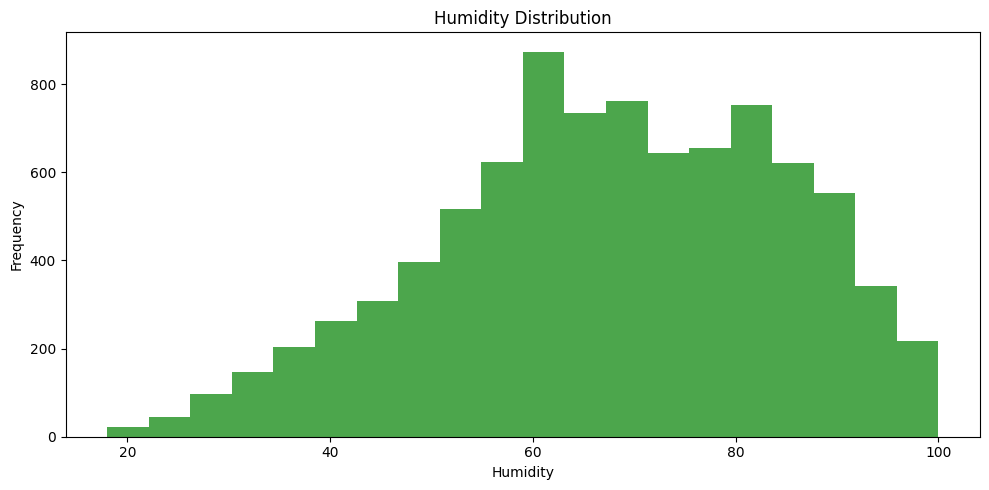

In [35]:
plt.figure(figsize=(10, 5))
plt.hist(data['Humidity'], bins=20, color='green', alpha=0.7)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()


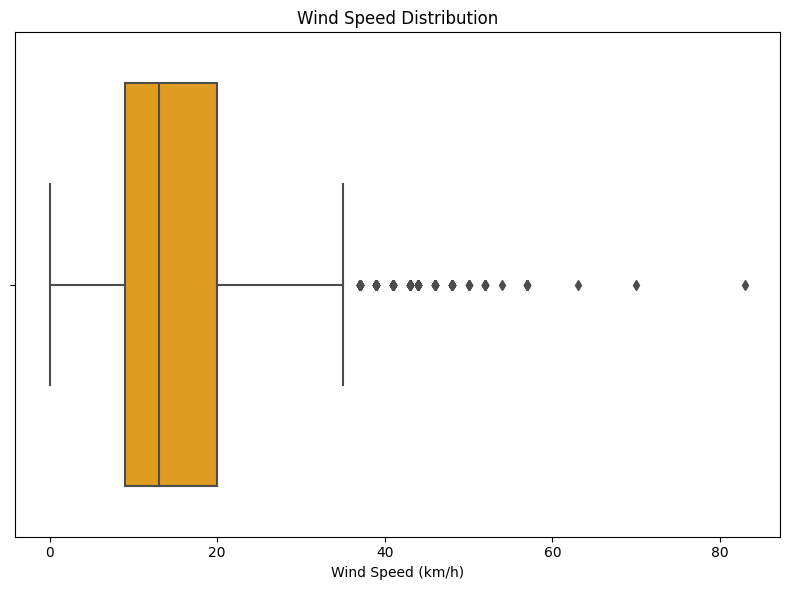

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Wind Speed_km/h'], color='orange')
plt.xlabel('Wind Speed (km/h)')
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

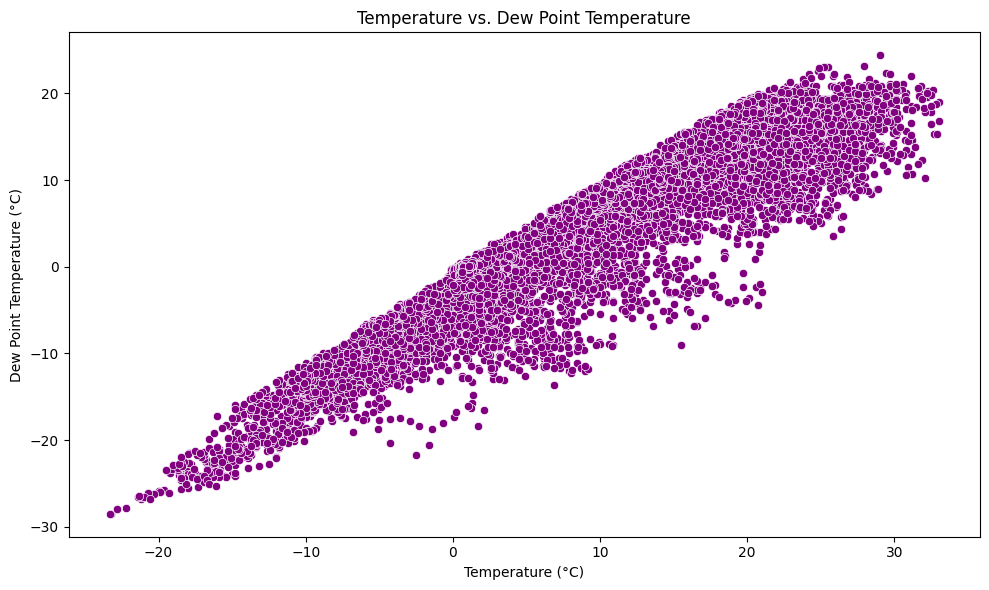

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', data=data, color='purple')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point Temperature (°C)')
plt.title('Temperature vs. Dew Point Temperature')
plt.tight_layout()
plt.show()

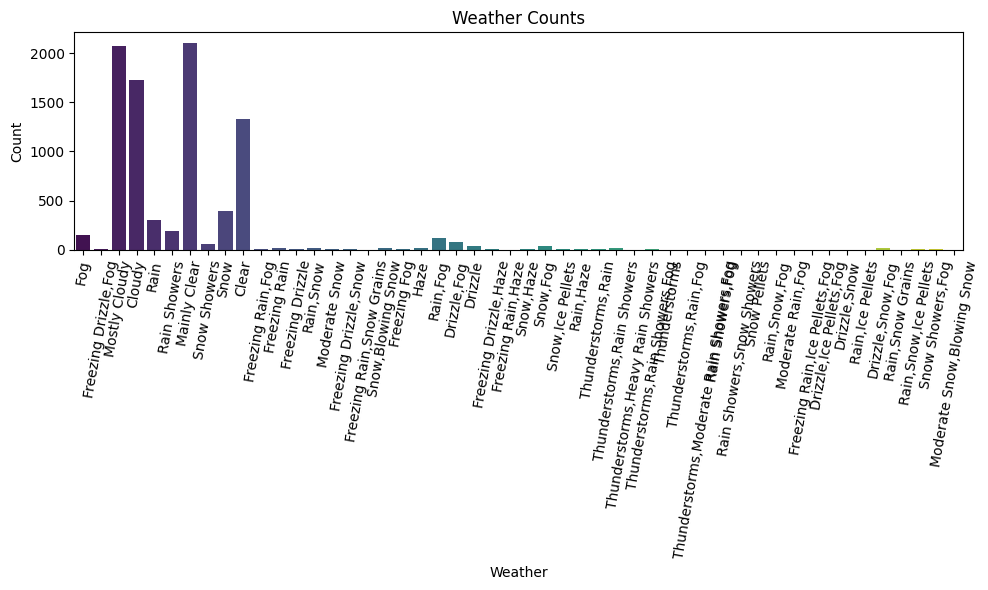

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather', data=data, palette='viridis')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Weather Counts')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()